# Used Cars

Used Cars dataset contains relevant imformation that Craigslist provides on car sales.
More information can be found at: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# mozes napravit specijalno rjesenja za npr samo toyotu

# price > 1 000 000?
# price = 0?
# cylinders nan?

## 1 Učitavanje podataka

Na samom početku je potrebno učitati podatke i pogledati od kojih se stupaca sastoji te kakve se informacije u njima pružaju.

In [2]:
df = pd.read_csv('vehicles.csv')
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
df = df.set_index('id')

In [4]:
df.shape

(426880, 25)

In [5]:
df.describe()

,price,year,odometer,county,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [6]:
df = df[df['price'] < 1000000]
df = df[df['price'] > 0]
df.describe()

,price,year,odometer,county,lat,long
count,393925.000000,392752.000000,3.916350e+05,0.0,390436.000000,390436.000000
mean,18916.331776,2011.008919,9.869091e+04,NaN,38.514120,-94.448441
std,15748.231707,9.623093,2.052945e+05,NaN,5.875029,18.194849
min,1.000000,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7000.000000,2008.000000,3.800000e+04,NaN,34.620000,-111.236250
50%,15000.000000,2013.000000,8.700000e+04,NaN,39.254962,-88.049143
75%,27590.000000,2017.000000,1.353290e+05,NaN,42.418751,-80.832039
max,999999.000000,2022.000000,1.000000e+07,NaN,82.390818,173.885502


## Obrada podataka

Nakon pregleda podataka, nastavlja se sa njihovom obradom. Prvi korak u obradi je pregled tipa stupaca i preoblikovanje tipa ukoliko je to potrebo. Možemo vidjeti da je stupac 'year' tipa float64 pa ga je potrebno pretvoriti u tip int64. Također ćemo izvući broj cilindara iz stringa stupaca cylinders i pretvoriti ga u tip int32.  Na posljetku prebaciti stupac 'posting_date' iz object u datetime.

In [7]:
df.dtypes

url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [8]:
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(pd.Int64Dtype())
df['cylinders'] = pd.to_numeric(df['cylinders'].apply(lambda x: str(x).split()[0]), errors='coerce').astype(pd.Int32Dtype())
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)
df.dtypes

url                          object
region                       object
region_url                   object
price                         int64
year                          Int64
manufacturer                 object
model                        object
condition                    object
cylinders                     Int32
fuel                         object
odometer                    float64
title_status                 object
transmission                 object
VIN                          object
drive                        object
size                         object
type                         object
paint_color                  object
image_url                    object
description                  object
county                      float64
state                        object
lat                         float64
long                        float64
posting_date    datetime64[ns, UTC]
dtype: object

## Nedostajuće vrijednosti i odabir značajki

Potrebno je i provjeriti postoje li Nan, odnosno nepostojeće vrijednosti kako bi se retci koji sadrže te vrijednosti uklonili, ili kako bi se te vrijednosti zamijenile nekom drugom vrijednosti koja se ond može koristiti u treniranju modela. 

In [9]:
df.isna().sum()

url                  0
region               0
region_url           0
price                0
year              1173
manufacturer     16176
model             4678
condition       151354
cylinders       161456
fuel              2594
odometer          2290
title_status      7734
transmission      1823
VIN             152108
drive           120217
size            282892
type             85893
paint_color     117109
image_url           62
description         64
county          393925
state                0
lat               3489
long              3489
posting_date        62
dtype: int64

In [10]:
df = df.dropna(subset=['year'])

cyl_median = df['cylinders'].median()
df['cylinders'].fillna(cyl_median, inplace=True)

df['odometer'] = df.apply(lambda x: df[df['year']==x['year']]['odometer'].mean() if pd.isna(x['odometer']) else x['odometer'], axis=1)
df.isna().sum()

url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     15007
model             4616
condition       150181
cylinders            0
fuel              2335
odometer             0
title_status      7430
transmission      1761
VIN             152046
drive           119935
size            281719
type             85719
paint_color     116971
image_url            0
description          2
county          392752
state                0
lat               3427
long              3427
posting_date         0
dtype: int64

In [11]:
df['year'].value_counts()

2018    32644
2017    32544
2013    28198
2015    27982
2016    27398
        ...  
1918        1
1943        1
1915        1
1905        1
1909        1
Name: year, Length: 112, dtype: Int64

Zbog malog broja podataka određenih godina izradnje automobila, odbacujemo podatke koji sadrže automobile napravljene 1990 godine i prije.

In [12]:
df = df[df['year'] > 1990]
df.isna().sum()

url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     12790
model             3565
condition       146538
cylinders            0
fuel              2319
odometer             0
title_status      7414
transmission      1750
VIN             141077
drive           115220
size            274413
type             80419
paint_color     112214
image_url            0
description          2
county          380035
state                0
lat               3398
long              3398
posting_date         0
dtype: int64

Sve kolone nisu potrebne za predikciju cijene automibila, zbog čega radimo novi skup podataka koji će sadržavati podskup kolona originalnog skupa podataka koji bi mogli biti od važnosti u predikciji. Kolona 'size' je izbačena jer sadrži 70% Nan vrijednosti.

In [13]:
df1 = df.copy()
df1 = df1[['price','year','manufacturer','condition','cylinders','odometer','fuel', 'transmission','drive','size','type']]

Također je potrebno pretvoriti određene kolone u kategoričke varijable kako bi se s njima moglo raditi u nekom prediktivnom modelu. Koristi se funckija get_dummies koja pretvara kolonu u indikatorske varijable. Postoji i mogućnosti pretvaranja kolone u kategorički tip, no ukoliko primjerice kolonu transmission pretvortimo u kategoričku varijablu gdje je 'automatic' označen sa 0, 'manual' sa 1 te 'other' sa 2, model bi mogao smatrati kako je 2>1>0 te da to predstavlja nekakav poredak. Da bi to izbjegli koristimo indikatorske varijable.

In [14]:
df1 = pd.get_dummies(df1, columns=['manufacturer','condition','fuel','type','transmission','drive','size'])
df1[10:20]

,price,year,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,size_sub-compact
id,,,,,,,,,,,,,,,,,,,,,
7316130053,4500,1992,6,192000.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
7315816316,32990,2017,6,30041.0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
7315770394,24590,2017,6,40784.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7315756348,30990,2016,6,34940.0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
7315715960,27990,2014,6,17805.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7315379459,37990,2016,8,9704.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7315275975,33590,2014,6,55251.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7315275942,30990,2019,6,1834.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7315270785,27990,2018,6,37332.0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [15]:
df1.isna().sum()

price                 0
year                  0
cylinders             0
odometer              0
manufacturer_acura    0
                     ..
drive_rwd             0
size_compact          0
size_full-size        0
size_mid-size         0
size_sub-compact      0
Length: 79, dtype: int64

Sljedeće su grafovi korišteni prilikom odluke oko nepostojećih vrijenosti u koloni 'cylinders'. Pokušao sam saznati postoji li neka korelacija između kolone 'cylinders' i ostalih kolona. Izgleda da ovisnost postoji, no problem je što i te kolone imaju nepostojeće vrijednosti pa je problem kako sve to skupa uskalditi. Na kraju sam se odlučio za opciju da zamjenim nepostojeće vrijednosti sa medijanom, jer bi bila šteta odbaciti sve podatke koji imaju nepostojeću vrijednost u koloni 'cylinders' premda je takvih više od trećine ukupnog broja podataka.

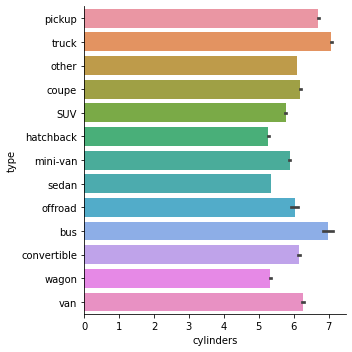

In [16]:
sns.catplot(x='cylinders',y='type',data=df,kind='bar')

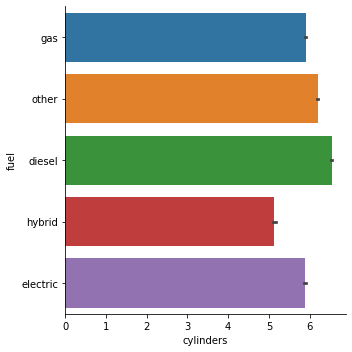

In [17]:
sns.catplot(x='cylinders',y='fuel',data=df,kind='bar')

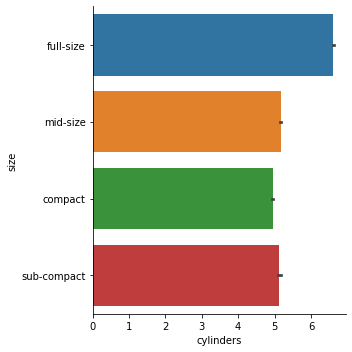

In [18]:
sns.catplot(x='cylinders',y='size',data=df,kind='bar')

In [19]:
cyl = df.groupby(['type','size'])['cylinders'].median()
cyl

type         size       
SUV          compact        4.0
             full-size      6.0
             mid-size       6.0
             sub-compact    4.0
bus          compact        4.0
             full-size      6.0
             mid-size       6.0
             sub-compact    8.0
convertible  compact        6.0
             full-size      6.0
             mid-size       6.0
             sub-compact    6.0
coupe        compact        6.0
             full-size      6.0
             mid-size       6.0
             sub-compact    6.0
hatchback    compact        4.0
             full-size      4.0
             mid-size       4.0
             sub-compact    4.0
mini-van     compact        6.0
             full-size      6.0
             mid-size       6.0
             sub-compact    4.0
offroad      compact        6.0
             full-size      6.0
             mid-size       6.0
             sub-compact    6.0
other        compact        8.0
             full-size      6.0
             mi

## Vizualizacija


Može se vidjeti porast cijena u odnosu na godinu kad je automobil napravljen. To je u skladu sa općenitim porastom cijena.

In [20]:
df1.pivot_table(values=['price'], index=['year'], aggfunc='mean')

,price
year,
1991,9256.038143
1992,9970.622735
1993,9634.438672
1994,8009.052632
1995,9110.865478
1996,9227.353763
1997,7802.228538
1998,6951.964176
1999,8215.272307


In [21]:
import random
idx = random.sample(range(df1.shape[0]), int(df1.shape[0]*0.1))
df_plot = df1.iloc[idx]
df_plot.shape

(38003, 79)

In [22]:
df_price = df1[df1['year']>1990]
idx = random.sample(range(df_price.shape[0]), int(df_price.shape[0]*0.1))
df_plot = df_price.iloc[idx]
df_plot.shape

(38003, 79)

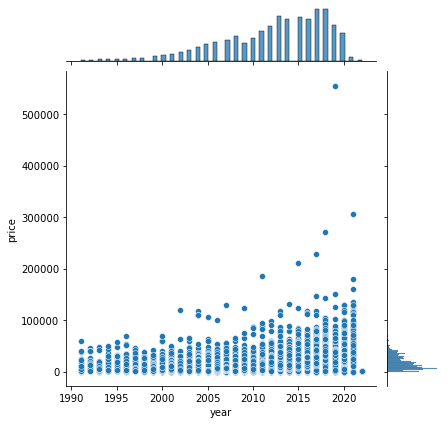

In [23]:
sns.jointplot(x='year',y='price',data=df_plot,kind='scatter')

C:\Users\pebe1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='odometer', ylabel='Density'>

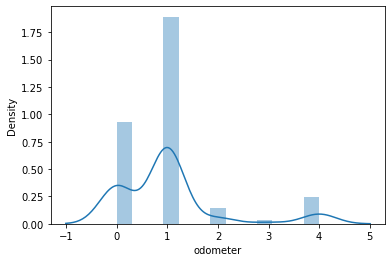

In [24]:
odometer_perc = np.percentile(df_plot['odometer'], q=[0.25,0.75])
df_odom = df_plot[df_plot['odometer'] > odometer_perc[0]]
df_odom = df_plot[df_plot['odometer'] < odometer_perc[1]]


sns.distplot(df_odom['odometer'])

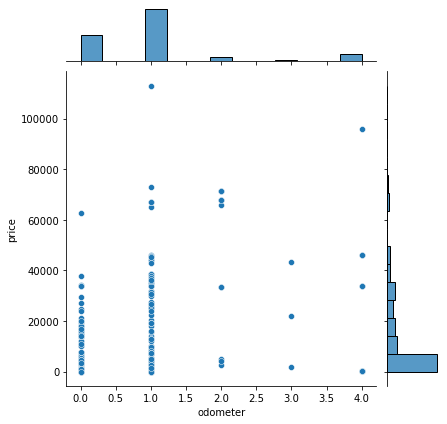

In [25]:
sns.jointplot(x='odometer',y='price',data=df_odom, kind='scatter')

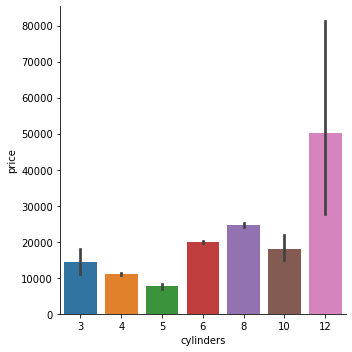

In [26]:
df_cyl = df_plot[~df_plot['cylinders'].isna()]
sns.catplot(x='cylinders',y='price',data=df_cyl,kind='bar')

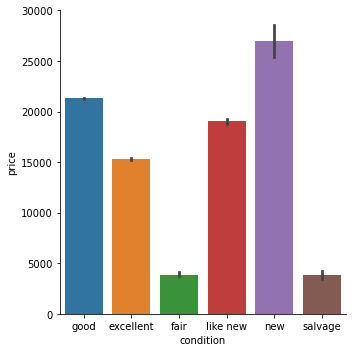

In [27]:
sns.catplot(x='condition', y='price', data=df, kind='bar')

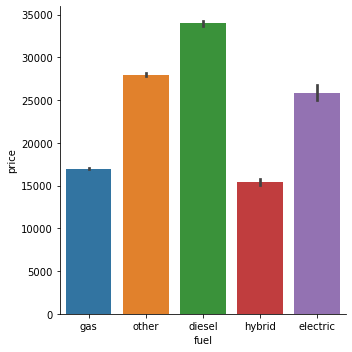

In [28]:
sns.catplot(x='fuel',y='price', data=df, kind='bar')

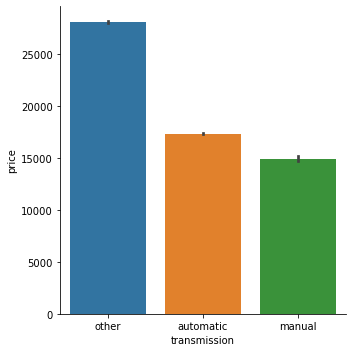

In [29]:
sns.catplot(x='transmission',y='price', data=df, kind='bar')

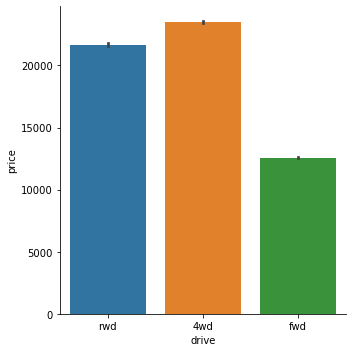

In [30]:
sns.catplot(x='drive',y='price', data=df, kind='bar')

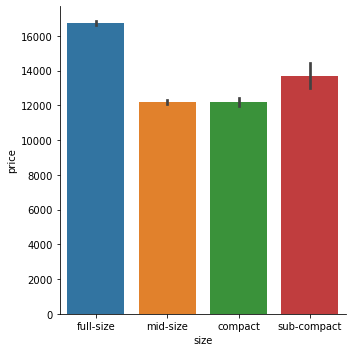

In [31]:
sns.catplot(x='size',y='price', data=df, kind='bar')

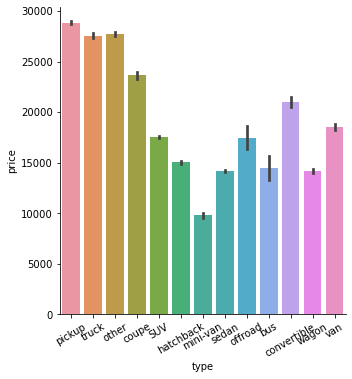

In [32]:
ax = sns.catplot(x='type',y='price', data=df, kind='bar')
ax.set_xticklabels(rotation=30)
plt.show()

## Podjela skupa podataka za fazu treniranja

Obrađeni je skup podataka potrebno podijelit na više dijelova kako bi se nad njima mogla raditi regresija. Najčešće se skup dijeli na podskup za trening i podskup za validaciju, a može se i dodatno podijeliti na podskup za tuning. Podskup za trening služi za treniranje modela, odnosno podešavanje parametara modela, a podskup za validaciju za usporedbu modela sa različitim hiperparametrima. Ta se usporedba radi na skupu za validaciju koji je različit od skupa za treniranje kako bi se izbjegla pristranost jer statistički gledano nije ispravno mjeriti točnost modela na skupu na kojem je treniran. Slična je uporaba i podskupa za tuning. On se koristi kad postoje hiperparametri na više razina. Također se originalni skup može podijeliti i na 10 (k) dijelo kad bi se radila 10-fold (k-fold) unakrsna validacija (cross-validation). Nakon što se podese hiperparametri modela, model se trenira na cjelokupnom skupu podataka prije nego se deploy-a.

In [33]:
# je li oblik u kojem su podaci dovoljan i prikladan za sve daljnje potrebe


# kak sam ja pripremil skup podataka za sljedeci korak
from sklearn.model_selection import train_test_split

X = df1.loc[:, df1.columns != 'price'].values
y = df1[['price']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
X_train.shape

(304028, 78)

In [35]:
X_test.shape

(76007, 78)

## Treniranje modela

In [36]:
# koji si model izabral i zakaj

# kako ste evaluirali performanse, koje metrike koristis
# kakvi su rezultati

# kak si spremil model za buduce koristenje
# postoji li neki drugi nacin

Problem predikcije cijene automobila je regresijski problem. On se razlikuje od klasifikacije u tome što je cilj klasifikacije pridijeliti jednu od klasa novom primjeru. S druge strane, regresijom se pokušava predvidjeti neka kontinuirana brojčana vrijednost na temelju novog primjera. U ovom je slučaju to cijena automobila. Svaka se metoda strojnog učenja sastoji od modela, objektivne funkcije i metode optimizacije. Samim time što se klasifikacijom dodjeljuje klasa nekom primjeru, a regresijom se predviđa brojčana vrijednost, njihove će objektivne funckije (model) i funkcije pogreške biti različite. Primjerice postoji SVM za klasifikaciju i za regresiju gdje je onaj za regresiju ima objektivnu funkciju koja je dodatno prilagođena za problem regresije.

Postoje razni regresijski modeli, od kojih su neki: linearna regresija, LS-SVM i regresijsko stablo odluke. Odlučujem se za linearnu regresiju. Kako bi ovaj model mogao raditi za kategoričkim varijablama potrebno ih je nekako pretvoriti u numeričke vrijednost. To je učinjeno u prethodnim koracima pomoću get_dummies funkcije. Tako će model moći naučiti važnost svake kategoričke varijable i tako odrediti vrijednost pripadajućih parametara.

### Linear regression

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
y_hat = model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print('Root Mean Squared Erorr (RMSE): ',np.sqrt(mse))
print('R^2 score: ', r2)

Root Mean Squared Erorr (RMSE):  11278.966808704326
R^2 score:  0.507395565096362


### Polynomial Regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train)
poly_features_test = poly.transform(X_test)

In [40]:
poly_features[:100000].shape

(100000, 3159)

In [44]:
poly_model = LinearRegression().fit(poly_features[:100000], y_train[:100000])
y_hat_poly = poly_model.predict(poly_features_test)

mse = mean_squared_error(y_test, y_hat_poly)
r2 = r2_score(y_test, y_hat_poly)

print('Root Mean Squared Erorr (RMSE): ',np.sqrt(mse))
print('R^2 score: ', r2)

Root Mean Squared Erorr (RMSE):  11612.818495844931
R^2 score:  0.47780229761007575
